<a href="https://colab.research.google.com/github/Seriphap/Exercise_Linear_Regression/blob/main/HW_1_2_Regression_6710422002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Gradient Descent (Kaggle Dataset)

Price  Rooms  Bathroom  Carspots  H Type  T Type  U Type  Sold 2016  \
0      1480000      2         1         1       1       0       0          1   
1      1035000      2         1         0       1       0       0          1   
2      1465000      3         2         0       1       0       0          0   
3       850000      3         2         1       1       0       0          0   
4      1600000      4         1         2       1       0       0          1   
...        ...    ...       ...       ...     ...     ...     ...        ...   
13513  1245000      4         2         2       1       0       0          0   
13514  1031000      3         2         2       1       0       0          0   
13515  1170000      3         2         4       1       0       0          0   
13516  2500000      4         1         5       1       0       0          0   
13517  1285000      4         1         1       1       0       0          0   

       Sold 2017  Distance  
0              0       2.5  
1              0       2.5  
2              1       2.5  
3              1       2.5  
4              0       2.5  
...          ...       ...  
13513          1      16.7  
13514          1       6.8  
13515          1       6.8  
13516          1       6.8  
13517          1       6.3  

[13518 rows x 10 columns]

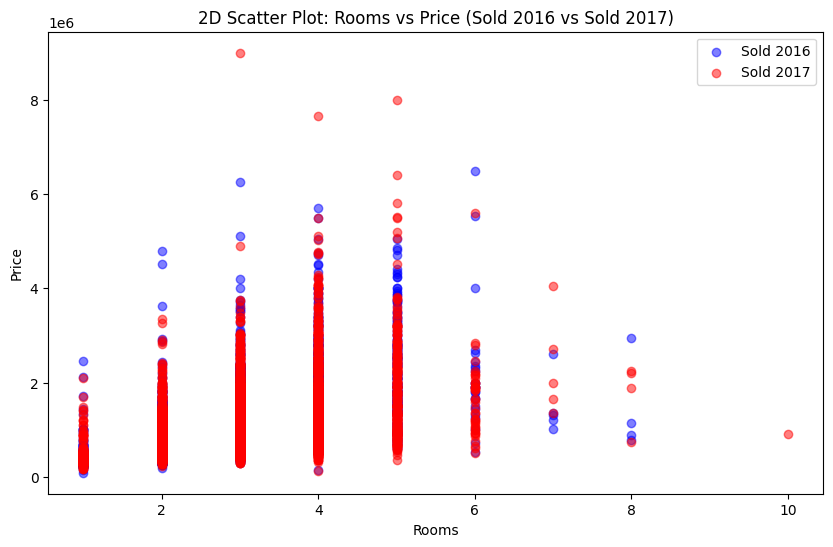


Iterations: 3857 / 1000000

Theta: [1074796.40471962  166898.96306359  180949.91977233   39153.18646842
   93592.07463449  -32138.28204011  -82325.15093055   -9995.0433977
    9995.0433977  -230551.38484688]

J(MSE): 113297822797.87769


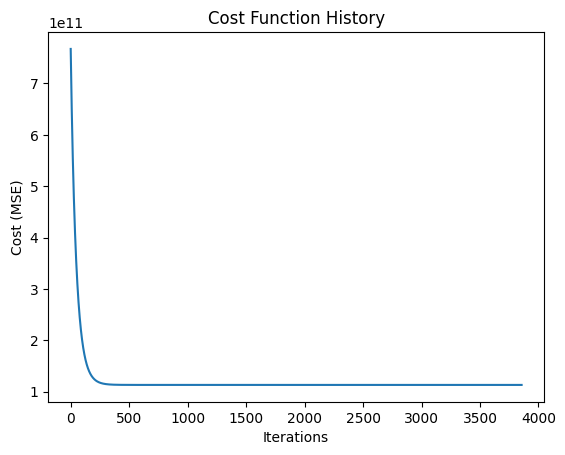


Result: y =  1074796.4  +  166898.96x1 + 180949.92x2 + 39153.19x3 + 93592.07x4 + -32138.28x5 + -82325.15x6 + -9995.04x7 + 9995.04x8 + -230551.38x9
Prediction: Price = 1074796.4 + 166898.96 * Rooms + 180949.92 * Bathroom + 39153.19 * Carspots + 93592.07 * H Type + -32138.28 * T Type + -82325.15 * U Type + -9995.04 * Sold 2016 + 9995.04 * Sold 2017 + -230551.38 * Distance


Price Predicted_Price Price_Diff    %Diff  Rooms  Bathroom  \
0      1,480,000       1,141,785   -338,215  -22.85%      2         1   
1      1,035,000       1,101,110     66,110    6.39%      2         1   
2      1,465,000       1,577,057    112,057    7.65%      3         2   
3        850,000       1,617,732    767,732   90.32%      3         2   
4      1,600,000       1,531,473    -68,527   -4.28%      4         1   
...          ...             ...        ...      ...    ...       ...   
13513  1,245,000       1,274,370     29,370    2.36%      4         2   
13514  1,031,000       1,489,270    458,270   44.45%      3         2   
13515  1,170,000       1,570,619    400,619   34.24%      3         2   
13516  2,500,000       1,524,419   -975,581  -39.02%      4         1   
13517  1,285,000       1,381,388     96,388    7.50%      4         1   

       Carspots  H Type  T Type  U Type  Sold 2016  Sold 2017  Distance  
0             1       1       0       0          1          0       2.5  
1             0       1       0       0          1          0       2.5  
2             0       1       0       0          0          1       2.5  
3             1       1       0       0          0          1       2.5  
4             2       1       0       0          1          0       2.5  
...         ...     ...     ...     ...        ...        ...       ...  
13513         2       1       0       0          0          1      16.7  
13514         2       1       0       0          0          1       6.8  
13515         4       1       0       0          0          1       6.8  
13516         5       1       0       0          0          1       6.8  
13517         1       1       0       0          0          1       6.3  

[13518 rows x 13 columns]

In [ ]:
# @title
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
pd.reset_option('display.max_rows')
# Cost Function
def cost_function(X, y, theta):
    N = len(y)
    Hypothesis = np.dot(X, theta)
    cost = (1/(2*N)) * np.sum(np.square(Hypothesis - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations, ep):
    N = len(y)
    cost_history = []
    #cost_history = np.zeros(iterations)

    # Early stopping condition based on cost change
    for i in range(iterations):
        Hypothesis = np.dot(X, theta)
        theta = theta - (learning_rate / N) * np.dot(X.transpose(), (Hypothesis - y))
        cost_history.append(cost_function(X, y, theta))
        #cost_history[i] = cost_function(X, y, theta)

        if i > 0 and np.abs(cost_history[i] - cost_history[i - 1]) <= ep:
          return theta, cost_history, i+1
          #return theta, cost_history[:i+1], i+1
    return theta, cost_history, iterations

#--------------------------------------------------------------------------
# Read the dataset from CSV
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MyData/melb_data_Cleaned_01.csv')
display(df)

# Scatter plot between Price (y) and Rooms (x)
x = df['Rooms']
y = df['Price']
sold_2016 = df[df['Sold 2016'] == 1]
sold_2017 = df[df['Sold 2017'] == 1]

plt.figure(figsize=(10, 6))# Create a figure for the 2D plot
plt.scatter(sold_2016['Rooms'], sold_2016['Price'], color='blue', label='Sold 2016', alpha=0.5)# Plot Sold 2016 with blue color
plt.scatter(sold_2017['Rooms'], sold_2017['Price'], color='red', label='Sold 2017', alpha=0.5)# Plot Sold 2017 with red color

# Set labels for the axes
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('2D Scatter Plot: Rooms vs Price (Sold 2016 vs Sold 2017)')

plt.legend()
plt.show()
#--------------------------------------------------------------------------'
target_column = 'Price'
feature_columns = df.columns[df.columns != target_column]  # All columns except the target

y = df[target_column].values  # Target
#y = df['Price'].values
X = df[feature_columns].values  # Features
#X = df[['Rooms', 'Bathroom', 'Carspots',.., etc']].values

 #Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize the feature data

X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones to X (all rows)
theta = np.zeros(X.shape[1]) #theta for first iteration (set theta=0,data=column of X)
#theta = np.full(X.shape[1], 0.1) #theta for first iteration (set theta=0.1,data=column of X)
#------------------------------------------------------------------------------

# Parameters
learning_rate = 0.01
iterations = 1000000
limited_iterations = iterations
ep = 1e-8

# Performing gradient descent
theta, cost_history, actual_iterations = gradient_descent(X, y, theta, learning_rate, iterations, ep)

print("\nIterations:", str(actual_iterations),"/",str(limited_iterations))
print("\nTheta:", theta)
print("\nJ(MSE):", cost_history[-1])
#print("J_history:", cost_history)

# Plotting cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function History")
plt.show()

# Print the final result
print("\nResult: y = ", str(np.round(theta[0], 2)), " + ", " + ".join([f"{np.round(theta[i+1], 2)}x{i+1}" for i in range(len(theta)-1)]))
# Print the final result with column names
equation = "Price = " + str(np.round(theta[0], 2))  # Start with the intercept (theta[0])
for i in range(1, len(theta)):  # Skip the first term (the intercept)
    equation += " + " + str(np.round(theta[i], 2)) + " * " + feature_columns[i-1]  # Link theta values with column names
print("Prediction:", equation)

# Summary Comparison Result
# After gradient descent completes, calculate the predicted prices
df['Predicted_Price'] = np.dot(X, theta)

# Format 'Price' and 'Predicted_Price' as currency (no decimals)
df['Price'] = df['Price'].apply(lambda x: f"{int(x):,}")
df['Predicted_Price'] = df['Predicted_Price'].apply(lambda x: f"{int(x):,}")

# Calculate the Difference between predicted price and actual price
df['Price_Diff'] = df['Predicted_Price'].apply(lambda x: int(x.replace(',', ''))) - df['Price'].apply(lambda x: int(x.replace(',', '')))
df['Price_Diff'] = df['Price_Diff'].apply(lambda x: f"{x:,}")  # Format as currency (with commas, no dollar sign)

# Calculate the Percentage Difference
df['%Diff'] = (df['Price_Diff'].apply(lambda x: int(x.replace(',', ''))) / df['Price'].apply(lambda x: int(x.replace(',', '')))) * 100

# Format the Percentage_Diff to show as percentage with 2 decimals
df['%Diff'] = df['%Diff'].apply(lambda x: f"{x:.2f}%")

# Display the table with actual prices, predicted prices, differences, and percentage differences
Summary_df = df[['Price', 'Predicted_Price', 'Price_Diff', '%Diff'] + list(feature_columns)]
display(Summary_df)


**Type: House, Sold 2017**

In [ ]:
# @title
pd.set_option('display.max_rows', None)
filtered_df = Summary_df[(Summary_df['H Type'] == 1) & (Summary_df['Sold 2017'] == 1)]
sorted_df = filtered_df.sort_values(by=['%Diff'], ascending=[True])
display(sorted_df)
pd.reset_option('display.max_rows')

Price Predicted_Price  Price_Diff     %Diff  Rooms  Bathroom  \
12293  1,492,000       1,491,863        -137    -0.01%      3         2   
13058  2,580,000       2,579,160        -840    -0.03%      5         5   
7592   1,210,000       1,209,474        -526    -0.04%      3         1   
1445   1,700,000       1,699,178        -822    -0.05%      4         2   
8467   1,200,000       1,199,015        -985    -0.08%      3         1   
10696    622,000         621,426        -574    -0.09%      4         2   
11463  1,550,000       1,548,271      -1,729    -0.11%      3         2   
7657   1,207,000       1,205,726      -1,274    -0.11%      4         1   
500      981,000         979,900      -1,100    -0.11%      2         1   
9700     850,000         848,845      -1,155    -0.14%      2         1   
13084  1,770,000       1,767,386      -2,614    -0.15%      4         2   
8810   1,100,000       1,097,902      -2,098    -0.19%      2         1   
4811   1,240,000       1,237,008      -2,992    -0.24%      3         1   
7975     910,000         907,846      -2,154    -0.24%      2         1   
12048  1,475,000       1,471,040      -3,960    -0.27%      4         2   
10425  1,540,000       1,533,975      -6,025    -0.39%      4         2   
7470   1,490,000       1,483,996      -6,004    -0.40%      3         2   
4558     921,000         917,150      -3,850    -0.42%      3         1   
11013  1,165,000       1,159,681      -5,319    -0.46%      3         1   
7664   1,385,000       1,377,882      -7,118    -0.51%      3         2   
12254  1,609,000       1,600,843      -8,157    -0.51%      4         2   
10475  1,171,000       1,164,954      -6,046    -0.52%      3         1   
8889   1,205,000       1,198,198      -6,802    -0.56%      3         2   
8196   1,300,000       1,292,600      -7,400    -0.57%      3         2   
4323   1,020,000       1,014,145      -5,855    -0.57%      3         1   
9659   1,000,000         994,196      -5,804    -0.58%      1         1   
10201    911,982         905,971      -6,011    -0.66%      4         2   
10163  1,265,000       1,256,675      -8,325    -0.66%      3         1   
12234  1,320,000       1,311,014      -8,986    -0.68%      3         2   
13503  1,263,500       1,254,703      -8,797    -0.70%      4         2   
9785   1,475,000       1,464,329     -10,671    -0.72%      3         2   
9942     685,000         679,709      -5,291    -0.77%      2         1   
8521   1,630,000       1,616,576     -13,424    -0.82%      4         2   
6543   1,630,000       1,616,576     -13,424    -0.82%      4         2   
10279    680,000         674,435      -5,565    -0.82%      2         1   
7700   1,300,000       1,288,142     -11,858    -0.91%      3         1   
10409  1,462,000       1,448,692     -13,308    -0.91%      4         2   
10410  1,130,000       1,119,530     -10,470    -0.93%      3         2   
9747   1,240,000       1,228,325     -11,675    -0.94%      3         2   
4316   1,065,000       1,054,819     -10,181    -0.96%      3         1   
11100    345,000         341,630      -3,370    -0.98%      4         1   
10679  1,070,000       1,059,189     -10,811    -1.01%      3         2   
12820  1,810,000       1,791,422     -18,578    -1.03%      4         3   
12077    427,500         422,979      -4,521    -1.06%      4         1   
12429    880,000         870,386      -9,614    -1.09%      3         2   
9790   1,030,000       1,018,699     -11,301    -1.10%      4         2   
7788   1,400,000       1,384,506     -15,494    -1.11%      4         2   
10620    647,000         639,841      -7,159    -1.11%      4         2   
8242   1,251,000       1,237,008     -13,992    -1.12%      3         1   
4393   1,035,000       1,023,167     -11,833    -1.14%      2         1   
4396   1,335,000       1,319,698     -15,302    -1.15%      3         1   
6512   1,900,000       1,877,957     -22,043    -1.16%      4         3   
10638    930,000         919,024    

In [ ]:
# @title
pd.set_option('display.max_rows', None)
filtered_df = Summary_df[Summary_df['U Type'] == 1]
sorted_df = filtered_df.sort_values(by=['Rooms', 'Bathroom', 'Carspots'], ascending=[True, True, True])
display(sorted_df)
pd.reset_option('display.max_rows')

Price Predicted_Price  Price_Diff     %Diff  Rooms  Bathroom  \
5535     760,500         279,995    -480,505   -63.18%      1         0   
107      442,500         534,234      91,734    20.73%      1         1   
226      421,500         376,173     -45,327   -10.75%      1         1   
247      390,000         376,173     -13,827    -3.55%      1         1   
504      500,000         364,373    -135,627   -27.13%      1         1   
1403     300,000         391,907      91,907    30.64%      1         1   
2257     392,500         321,106     -71,394   -18.19%      1         1   
2264     300,000         321,106      21,106     7.04%      1         1   
2652      85,000         372,240     287,240   337.93%      1         1   
2666     357,000         372,240      15,240     4.27%      1         1   
2815     328,000         302,163     -25,837    -7.88%      1         1   
3118     320,000         443,041     123,041    38.45%      1         1   
3136     292,000         443,041     151,041    51.73%      1         1   
3352     460,000         313,239    -146,761   -31.90%      1         1   
3549     445,000         498,833      53,833    12.10%      1         1   
3976     427,000         513,842      86,842    20.34%      1         1   
3983     386,000         513,842     127,842    33.12%      1         1   
3987     450,000         513,842      63,842    14.19%      1         1   
3990     210,000         513,842     303,842   144.69%      1         1   
3992     375,000         513,842     138,842    37.02%      1         1   
4001     436,000         513,842      77,842    17.85%      1         1   
4418     385,000         407,640      22,640     5.88%      1         1   
4432     320,000         407,640      87,640    27.39%      1         1   
4452     410,000         407,640      -2,360    -0.58%      1         1   
5295     345,000         521,709     176,709    51.22%      1         1   
5570     320,000         541,376     221,376    69.18%      1         1   
5584     315,000         494,175     179,175    56.88%      1         1   
5588     422,000         534,234     112,234    26.60%      1         1   
5627     450,000         534,234      84,234    18.72%      1         1   
5664     523,000         494,175     -28,825    -5.51%      1         1   
5667     320,000         534,234     214,234    66.95%      1         1   
5679     367,000         494,175     127,175    34.65%      1         1   
5684     410,000         494,175      84,175    20.53%      1         1   
5691     280,000         534,234     254,234    90.80%      1         1   
5707     260,800         494,175     233,375    89.48%      1         1   
5728     455,000         616,835     161,835    35.57%      1         1   
5810     420,000         384,040     -35,960    -8.56%      1         1   
5816     335,000         384,040      49,040    14.64%      1         1   
5833     366,000         424,099      58,099    15.87%      1         1   
6253     517,500         368,306    -149,194   -28.83%      1         1   
6862     565,000         564,976         -24    -0.00%      1         1   
6865     750,000         564,976    -185,024   -24.67%      1         1   
6974     365,000         328,972     -36,028    -9.87%      1         1   
7022     371,000         328,972     -42,028   -11.33%      1         1   
7462     405,000         416,232      11,232     2.77%      1         1   
7699     595,000         538,167     -56,833    -9.55%      1         1   
7779     550,000         601,102      51,102     9.29%      1         1   
7939     317,500         483,100     165,600    52.16%      1         1   
7940     160,000         483,100     323,100   201.94%      1         1   
7944     275,000         483,100     208,100    75.67%      1         1   
8081     333,000         553,901     220,901    66.34%      1         1   
8084     275,000         553,901     278,901   101.42%      1         1   
8367     410,000         534,234    

**Type: TownHouse**

In [ ]:
# @title
pd.set_option('display.max_rows', None)
filtered_df = Summary_df[Summary_df['T Type'] == 1]
sorted_df = filtered_df.sort_values(by=['Rooms', 'Bathroom', 'Carspots'], ascending=[True, True, True])
display(sorted_df)
pd.reset_option('display.max_rows')

Price Predicted_Price  Price_Diff     %Diff  Rooms  Bathroom  \
1292     895,000         540,390    -354,610   -39.62%      1         1   
8851     500,000         611,191     111,191    22.24%      1         1   
9660     780,000         674,125    -105,875   -13.57%      1         1   
10363    715,000         611,191    -103,809   -14.52%      1         1   
1232     681,000         324,669    -356,331   -52.32%      1         1   
1329     625,000         541,006     -83,994   -13.44%      1         1   
2795     345,000         383,670      38,670    11.21%      1         1   
8631     425,000         620,398     195,398    45.98%      1         1   
10426    470,000         388,328     -81,672   -17.38%      1         1   
11472    503,750         -60,079    -563,829  -111.93%      1         1   
12936    580,000         703,000     123,000    21.21%      1         1   
135      650,000         627,637     -22,363    -3.44%      2         1   
3547     812,000         714,172     -97,828   -12.05%      2         1   
6504     830,000         564,703    -265,297   -31.96%      2         1   
8638     811,000         754,231     -56,769    -7.00%      2         1   
8901     936,000         848,632     -87,368    -9.33%      2         1   
48       450,000         389,040     -60,960   -13.55%      2         1   
189      421,000         523,501     102,501    24.35%      2         1   
198      640,000         523,501    -116,499   -18.20%      2         1   
455      585,000         547,101     -37,899    -6.48%      2         1   
508    1,255,000         538,510    -716,490   -57.09%      2         1   
536      760,000         538,510    -221,490   -29.14%      2         1   
544      700,000         538,510    -161,490   -23.07%      2         1   
701      851,000         408,707    -442,293   -51.97%      2         1   
773      680,000         408,707    -271,293   -39.90%      2         1   
829      486,500         373,307    -113,193   -23.27%      2         1   
1033     475,000         535,301      60,301    12.69%      2         1   
1253   1,014,000         499,176    -514,824   -50.77%      2         1   
1269     605,000         715,513     110,513    18.27%      2         1   
1402     380,000         687,979     307,979    81.05%      2         1   
1420     680,000         687,979       7,979     1.17%      2         1   
1453     598,000         687,979      89,979    15.05%      2         1   
1576     900,400         613,244    -287,156   -31.89%      2         1   
1677     765,000         794,181      29,181     3.81%      2         1   
1737     707,000         471,642    -235,358   -33.29%      2         1   
1747     855,000         471,642    -383,358   -44.84%      2         1   
1911     640,000         786,314     146,314    22.86%      2         1   
1969     635,000         653,303      18,303     2.88%      2         1   
1983     598,000         613,244      15,244     2.55%      2         1   
2031     570,000         613,244      43,244     7.59%      2         1   
2040     600,000         598,235      -1,765    -0.29%      2         1   
2047     591,000         558,177     -32,823    -5.55%      2         1   
2076     750,000         857,115     107,115    14.28%      2         1   
2475     590,000         605,377      15,377     2.61%      2         1   
2512     805,000         691,912    -113,088   -14.05%      2         1   
2551     710,000         857,115     147,115    20.72%      2         1   
2665     480,000         668,312     188,312    39.23%      2         1   
2687     560,000         668,312     108,312    19.34%      2         1   
2800     585,000         558,177     -26,823    -4.59%      2         1   
2830     600,000         558,177     -41,823    -6.97%      2         1   
2921     434,500         408,707     -25,793    -5.94%      2         1   
2925     420,000         408,707     -11,293    -2.69%      2         1   
3006     468,000         444,108    